In [142]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [170]:
#dataset

data_train = pd.read_csv('./Dataset/Train.csv')
data_test = pd.read_csv('./Dataset/test.csv')

In [171]:
data_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [172]:
data_train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

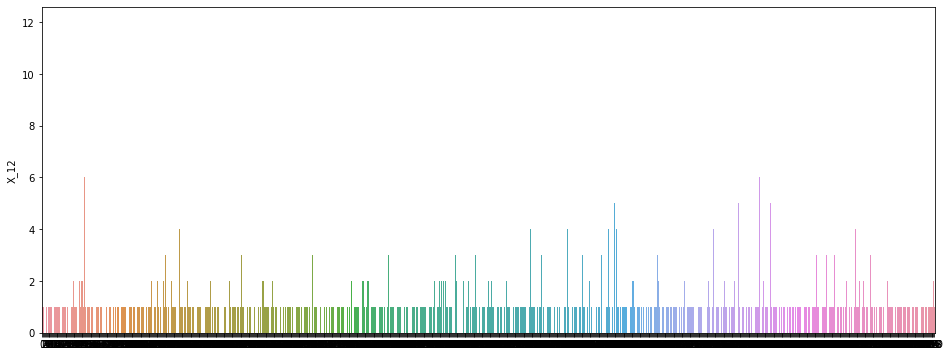

In [146]:
#plotting the graph w.r.t to X_12 which has empty values

temp_X = data_train.iloc[:1000,:]
plt.figure(figsize=(16,6))
sns.barplot(x=temp_X.index,y=temp_X['X_12'])
plt.show()

In [173]:
#preprocessing

data_train['X_12'] = data_train['X_12'].fillna(value=data_train['X_12'].median())
data_train = data_train.drop(['INCIDENT_ID','DATE'], axis=1)

In [174]:
#splitting the training and validation sets

X_train, X_val, y_train, y_val = train_test_split(data_train.drop(['MULTIPLE_OFFENSE'],axis=1),data_train['MULTIPLE_OFFENSE'], test_size=0.01, 
                                                    random_state=101)

In [176]:
#normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.fit_transform(X_val)

In [177]:
#training and fitting svm model

model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_val)
print(confusion_matrix(y_val,predictions))
print(classification_report(y_val,predictions))

[[ 10   3]
 [  0 226]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.99      1.00      0.99       226

    accuracy                           0.99       239
   macro avg       0.99      0.88      0.93       239
weighted avg       0.99      0.99      0.99       239



In [178]:
#predicting on validation set

X_val = sc_X.fit_transform(X_val)
y_pred = model.predict(X_val)
accuracy_score(y_val,y_pred)

0.9874476987447699

In [179]:
#filling the null values with median of the column and removing unnecessary columns

data_test['X_12'] = data_test['X_12'].fillna(value=data_test['X_12'].median())
temp_test = data_test.drop(['INCIDENT_ID','DATE'], axis=1)
temp_test = sc_X.fit_transform(temp_test)

In [180]:
#predicting on test set

test_pred = model.predict(temp_test)

In [181]:
res = pd.DataFrame({'INCIDENT_ID': data_test['INCIDENT_ID'], 'MULTIPLE_OFFENSE': test_pred})

In [182]:
res.MULTIPLE_OFFENSE.value_counts()

1    15461
0      442
Name: MULTIPLE_OFFENSE, dtype: int64

In [183]:
res.to_csv('malicious_offense.csv', index=False)